<a href="https://colab.research.google.com/github/BMSaumya/Inspiher/blob/main/famsize_of_tasktest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("student-mat.csv")

In [3]:
ds.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
ds.isnull().values.any()

False

In [5]:
train_set, test_set=train_test_split(ds, test_size=0.2, random_state=42)

In [6]:
train_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [7]:
test_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


<ipython-input-20-94b8a6565c0a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})


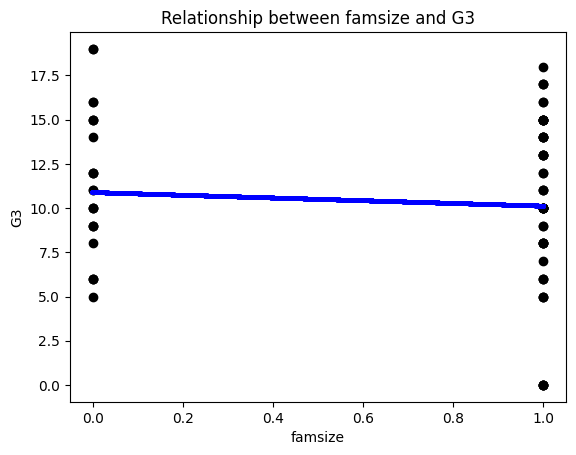

Coefficient: [-0.77158309]
Intercept: 10.877777777777778


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['famsize', 'G1', 'G2', 'G3']]

# Convert 'famsize' to numeric (if needed)
# You can use LabelEncoder or map 'yes' to 1 and 'no' to 0
data['famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})

# Split the data into features (X) and target variable (y)
X = data[['famsize']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the relationship between 'famsize' and 'G3'
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('famsize')
plt.ylabel('G3')
plt.title('Relationship between famsize and G3')
plt.show()

# Print the coefficients of the linear regression model
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)


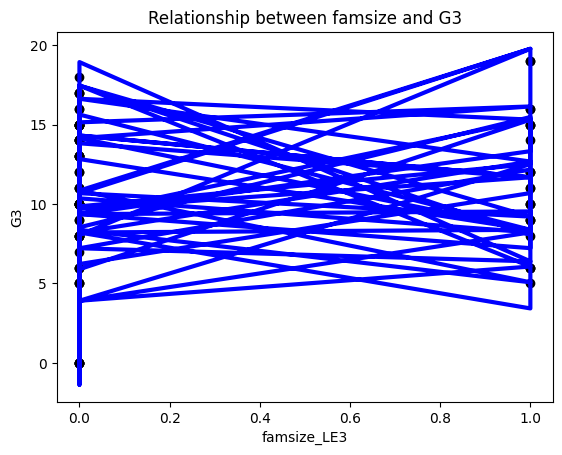

Coefficients: [0.16309011 0.99315429 0.00680059]
Intercept: -2.0381193571405145


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['famsize', 'G1', 'G2', 'G3']]

# One-hot encode 'famsize'
data = pd.get_dummies(data, columns=['famsize'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the relationship between 'famsize' and 'G3'
plt.scatter(X_test['famsize_LE3'], y_test, color='black')  # Assuming 'yes' indicates receiving school support
plt.plot(X_test['famsize_LE3'], y_pred, color='blue', linewidth=3)
plt.xlabel('famsize_LE3')
plt.ylabel('G3')
plt.title('Relationship between famsize and G3')
plt.show()

# Print the coefficients of the linear regression model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


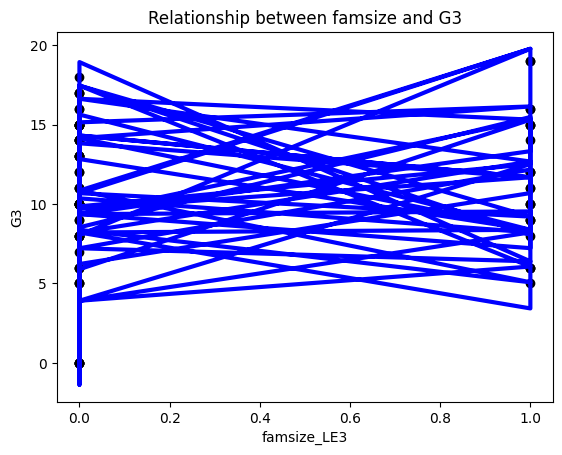

,G1,G2,famsize_LE3
0,5,6,0
1,5,5,0
2,7,8,1
3,15,14,0
4,6,10,0


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['famsize', 'G1', 'G2', 'G3']]

# One-hot encode 'famsize'
data = pd.get_dummies(data, columns=['famsize'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the relationship between 'famsize' and 'G3'
plt.scatter(X_test['famsize_LE3'], y_test, color='black')  # Assuming 'yes' indicates receiving school support
plt.plot(X_test['famsize_LE3'], y_pred, color='blue', linewidth=3)
plt.xlabel('famsize_LE3')
plt.ylabel('G3')
plt.title('Relationship between famsize and G3')
plt.show()

# Create a new data point for prediction
# new_data = {'famsize_yes': 1, 'G1': 15, 'G2': 16}
# new_data_df = pd.DataFrame([new_data])

X.head()

# Use the trained model to predict G3 for the new data point
# predicted_g3 = model.predict(new_data_df[['famsize_yes', 'G1', 'G2']])

# # Display the result
# print("Predicted G3 for a student with address_yes:", predicted_g3[0])


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['famsize', 'G1', 'G2', 'G3']]

# One-hot encode 'famsize'
data = pd.get_dummies(data, columns=['famsize'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_test_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_test_pred)


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.21183583 12.16979422  3.42372301  8.20499012  8.37488082 12.82996771
 18.93736992  6.38857223  7.21183583 12.66687761 15.14245651  6.05559143
 13.82312201 11.68052391 14.31239232  7.70110615  6.21868154 10.68736961
 15.47543731  8.53117033 14.14930222 16.14241139 15.14245651  4.73625693
  8.04190002 19.77423469 10.68056902  9.204945   17.45494531 10.68056902
  8.20499012  7.21183583 15.30554662 12.82996771  6.05559143  3.90619274
 -1.38575894 15.14245651 11.83681342  7.87880991  5.22552724 10.19129871
 14.14930222  8.37488082 15.63172683  9.68741473 11.68052391 14.31239232
 12.5037875  15.63172683 13.15614793 15.14245651 10.35438881  8.21179071
  3.90619274 12.51058809  9.85050484  5.89250133 15.3

[ 9.84  9.29 10.56 12.03 10.06  9.6  14.78 11.3   9.25 12.71 12.89 12.55
 11.55  9.6  11.06  9.99 10.83 10.26  8.49  6.46 12.72 10.85 10.65  9.16
 10.63 11.77 12.52 11.23 12.13 12.53 10.28 11.19 13.45 11.44 11.13  9.34
  1.49 12.54 12.39 10.12  8.76 11.25 12.18  9.49 11.73 12.37 10.71  9.38
 12.39 12.91  9.77 14.5  11.78 11.13 11.57 10.95 11.71  8.96 12.16 12.81
 13.28 11.46  9.41 12.73 10.3  10.57 10.36 10.85 11.07 11.57 10.64 11.25
 12.4  15.12  9.27 11.13 13.42 12.63  8.67]
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]


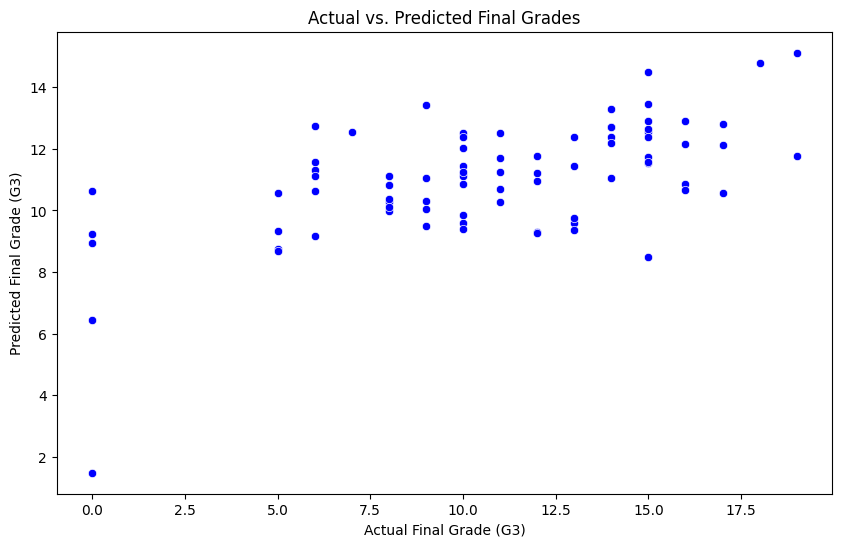

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Handle categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features (X) and target variable (y)
X = df.drop(['G1', 'G2', 'G3'], axis=1)  # Exclude G1, G2, G3 for simplicity
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)
print(y_test.values.tolist())

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Actual vs. Predicted Final Grades')
plt.show()
